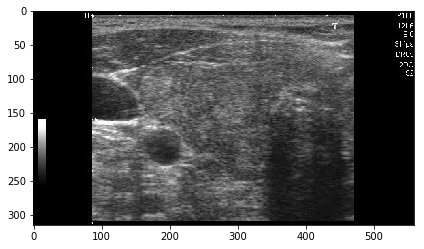

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import cv2
import numpy as np 	
from skimage import io
import xml.etree.ElementTree as et

import matplotlib.pyplot as plt
%matplotlib inline

# Read image file
img = cv2.imread("data/benign/575/1.jpg")

# Display image
io.imshow(img)

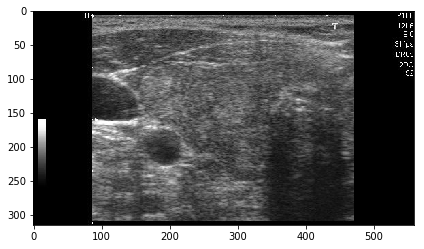

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Display grayscale image
io.imshow(gray)

In [3]:
# Parse the xml file to get data points of marked region
e = et.parse('data/benign/575/575.xml').getroot()

# Declare arrays to store x,y co-ordinates from annotation file
x_pts = []
y_pts = []

# Declare image number in each folder
image = 0

# Parse for each child in xml tree
for child in e:
    
    # Parse for each subchild (image number, and svg x,y pairs) in xml tree:
    for subchild in child:
        
        # Check and store image number to match with image to be processed
        if subchild.tag =='image':
            image = int(subchild.text)
            continue
        
        # Check to match the image number with the image file and collect x,y co-ordinate pairs    
        if subchild.tag == 'svg' and image == 1:
            points = subchild.text
            len_points = len(points)
            for i in range(0, len_points-47, 1):
                
                # Collect all x-points
                if points[i]=='x':
                    x_pt = points[i+4]
                    for j in range(1, 3, 1):
                        if not points[i+4+j].isdigit():
                            break
                        else:
                            x_pt = x_pt + points[i+4+j]
                    x_pts = np.append(x_pts, int(x_pt))
                
                # Collect all y-points    
                if points[i]=='y':
                    y_pt = points[i+4]
                    for j in range(1, 3, 1):
                        if not points[i+4+j].isdigit():
                            break
                        else:
                            y_pt = y_pt + points[i+4+j]
                    y_pts = np.append(y_pts, int(y_pt))
                    
# Calculate the minimum and maximum values of x-points and y-points 
# to find co-ordinates of cropped image
x_min = int(np.min(x_pts))
x_max = int(np.max(x_pts))

y_min = int(np.min(y_pts))
y_max = int(np.max(y_pts))

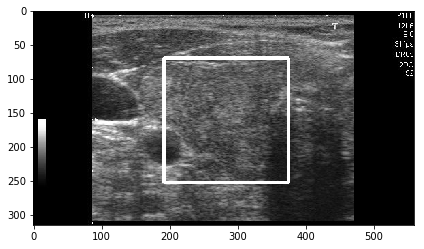

In [4]:
# Plot a rectangle over the area to be cropped ans display image
rect = cv2.rectangle(gray, (x_min, y_min), (x_max, y_max), (255, 0, 0), 3)
plt.figure()
io.imshow(rect)

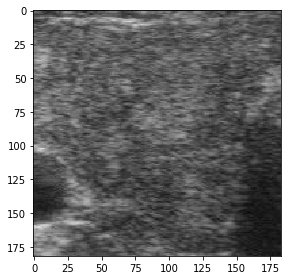

In [5]:
# Crop image and display cropped image
crop_img = img[y_min:y_max, x_min:x_max]
io.imshow(crop_img)

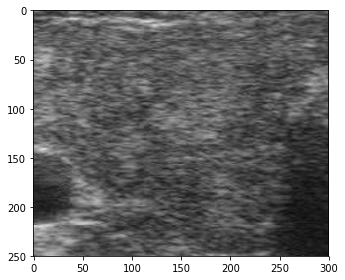

In [6]:
# Resize cropped image and display resized image
resize_img = cv2.resize(crop_img, (300, 250), interpolation = cv2.INTER_CUBIC)
io.imshow(resize_img)